# Content

1. [Fetch, extract, and import dataset automatically](#AUTO)
2. [Exploratory Data Analysis (EDA)](#EDA)
3. [Sampling Methods](#SAMPLING)
4. [EDA #2](#EDA#2)
5. [Data Cleaning](#DataCleaning)
6. [Feature Scaling](#FeatureScaling)
7. [Select & Train a Model](#SelectTrainModel)

<a name="AUTO"> </a>
# Fetch the Data
Define a function to automatically fetch and extract the dataset

In [1]:
import os
import tarfile
import urllib

# the github account that the dataset lives
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# create a directory to store the fetched data (datasets/housing)
HOUSING_PATH = os.path.join("datasets", "housing")
# path the to linked file
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Fetch the dataset from the housing URL and store it to the specificied directory."""
    # make the directory specified, if it exists stop
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # download the dataset and put it in the specified directory
    urllib.request.urlretrieve(housing_url, tgz_path)
    # open TGZ file
    housing_tgz = tarfile.open(tgz_path)
    # extract all files
    housing_tgz.extractall(path=housing_path)
    # close TGZ file
    housing_tgz.close()
    

fetch_housing_data()

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    """Automatically load the data."""
    # path to the CSV file
    csv_path = os.path.join(housing_path, "housing.csv")
    # read the CSV file
    return pd.read_csv(csv_path)

<a name="EDA"> </a>
# Exploratory Data Analysis

In [3]:
# import the data
housing = load_housing_data()

# print the first 5 rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# print a quick data description
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Column 4: ***total_bedrooms 20433*** has less values that the rest.
* Column 9: ***ocean_proximity*** is of type object (categories?).

In [5]:
# check how many categories exist for the ocean_proximity
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# print a summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


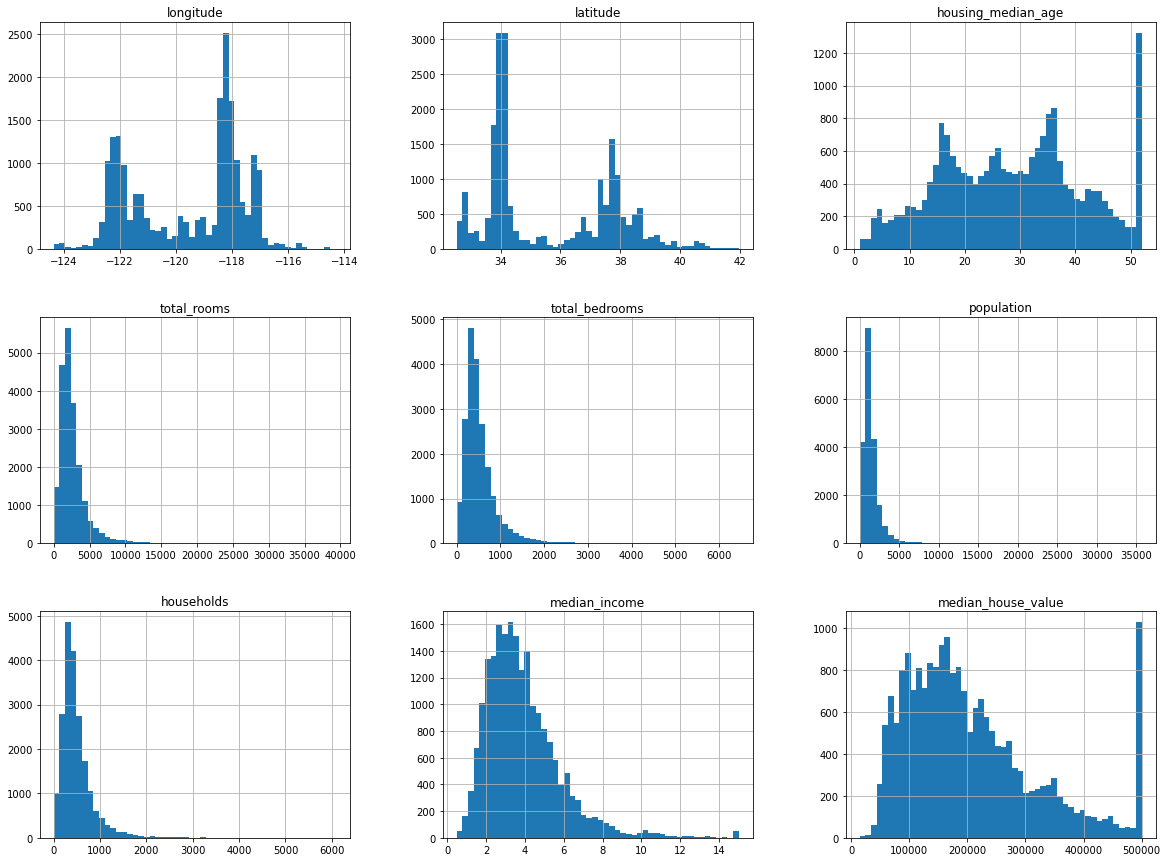

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# create a histogram for each of the dataframe variables
housing.hist(bins=50, figsize=(20,15))
plt.show()

* *Median income* attribute does not look like it is expressed is USD.
    * the data were scaled and capped at 15 (15.0001) for higher median incomes and at 0.5 (0.4999) for lower median incomes.
    * the numbers represent roughly tens of thousands of dollars (e.g. 3 = 30,000).
* *Housing median age* and *median house value* were also capped. The latter is the **target** attribute, hence, it may be a serious problem.
    * The ML algorithms may learn that prices never go beyond that limit. If it is intented to predict precisly beyond 500,000:
        1. Collect proper labels for the districts whose labels were capped.
        2. Remove those districts from the training set (and also from the test set).
        
* These attributes have very **different scales** (*feature scaling*).
* Many histograms are **tail-heavy** which may make it a bit harder for some ML algorithms to detect patterns (*transformation*).

<a name="SAMPLING"> </a>
# Sampling Methods 
## Creating a Test Set

**Random Sampling** methods are generally fine if the dataset is large enough (relative to the number of Xs), but if not there is a risk of introducing **sampling bias**.

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset into train/test sets using random sampling methods
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

If we want to **maintain the ratio of the sample** we use **stratified sampling**.

<AxesSubplot:>

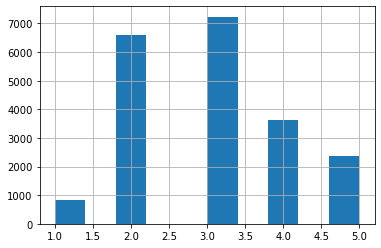

In [10]:
import numpy as np

# create categories (strata)
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

# visualize categories
housing["income_cat"].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified sampling based on income category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# check income category proportions in the test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [12]:
# check income category proportions in the overall set 
housing["income_cat"].value_counts() / len(housing["income_cat"])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [14]:
# remove the income cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<a name="EDA#2"> </a>
# Exploratory Data Analysis #2

In [15]:
# create a copy of the training set to explore
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

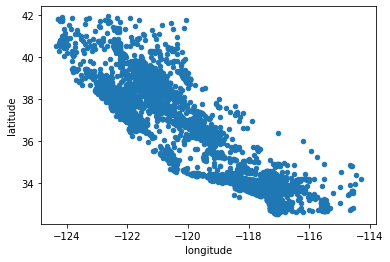

In [16]:
# create a scatterplot of all districts
housing.plot(kind="scatter", x="longitude", y="latitude")

It is hard to see any particularly patttern that way. Changing the transparency will allows us to see higher- and lower-density areas in a more clear way.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

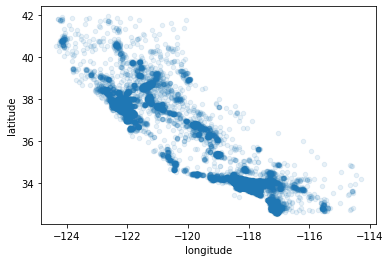

In [18]:
# create the same plot with modified transparency
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

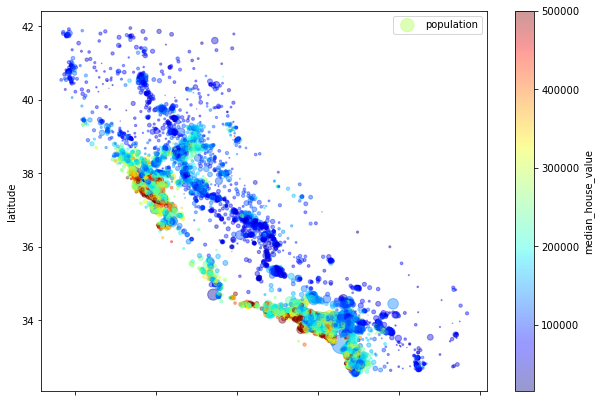

In [19]:
# visualize house prices, size = population, color = price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
            )
plt.legend()

* Housing prices are very much related to the location (close to the ocean)
* Housing prices are related to the population density

A clustering algorithm could be useful for detecting the main cluster and for adding new Xs that measure the proximity to the cluster centers.

In [20]:
# calcuate the correlations
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

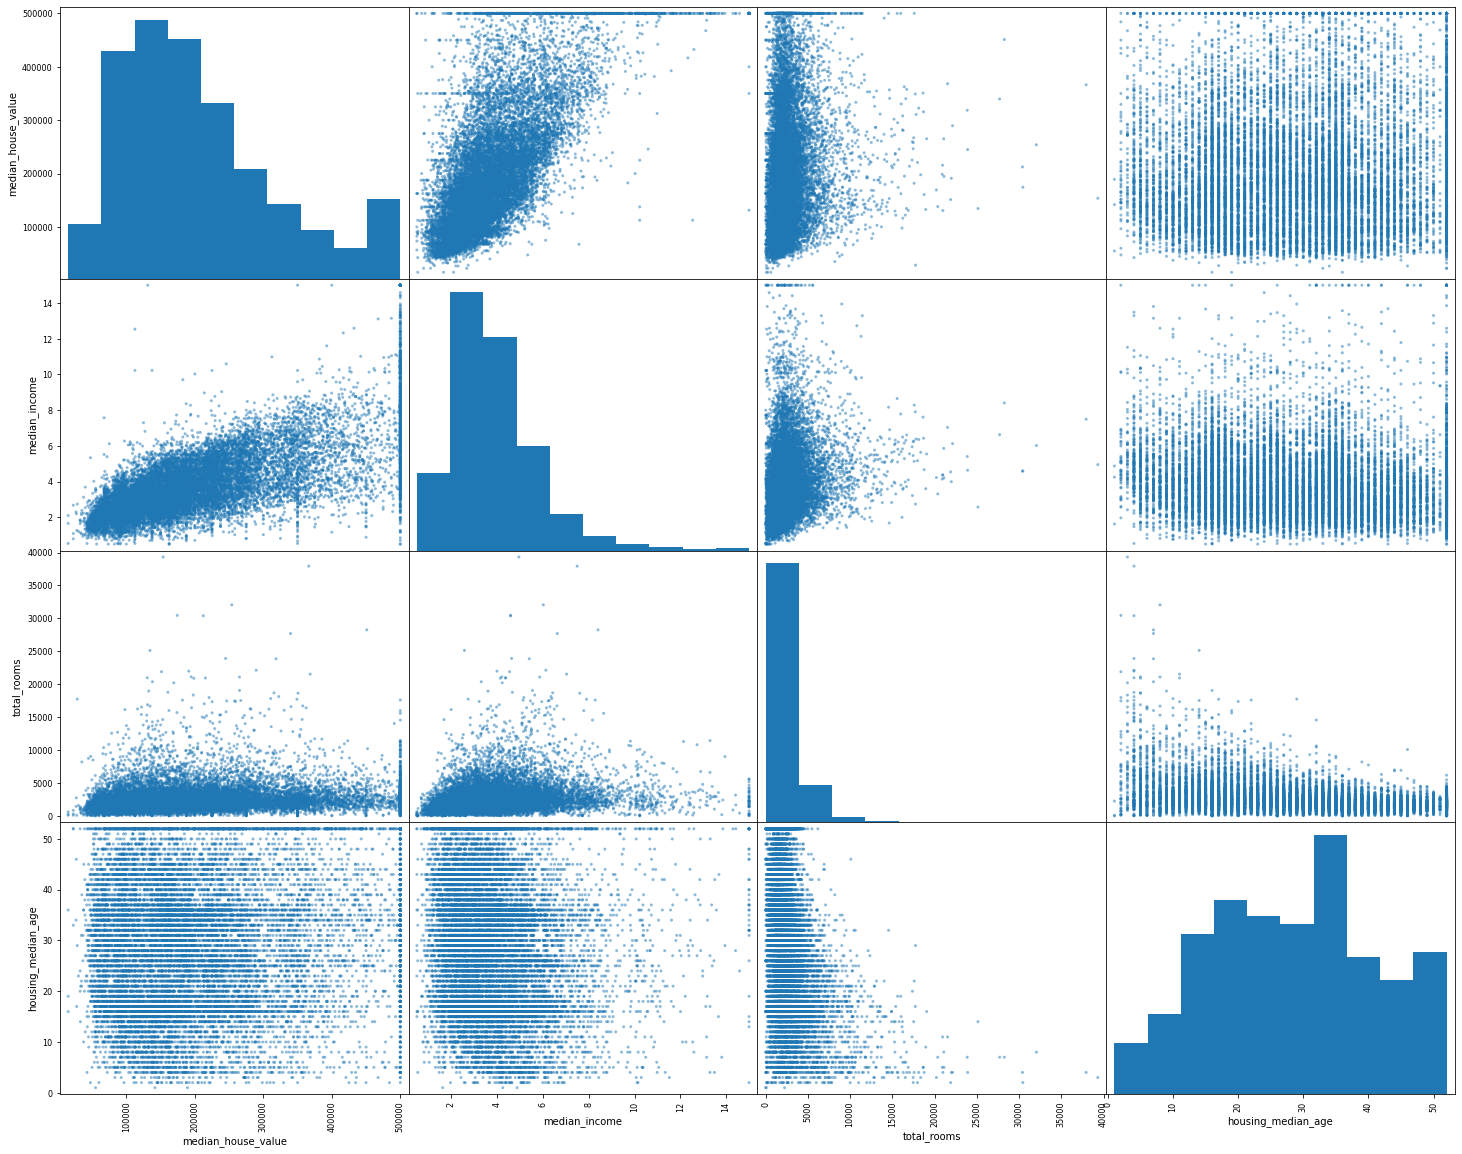

In [26]:
from pandas.plotting import scatter_matrix

# visualize the most important correlations
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(25, 20))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

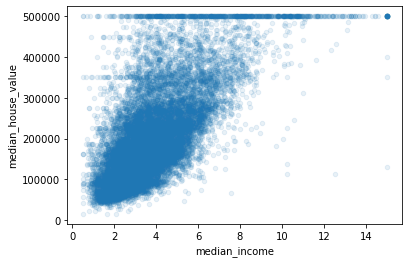

In [27]:
# focus on the most important feature
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

* Correlation is indeed strong (~0.7).
* The price cap at 500,000 is clearly visible.
* There are some additional "straight lines" at 450000, 350000. We may want to remove the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

<a name="FE"> </a>
# Feature Engineering

1. Total number of rooms is not very useful if you do not know the number of households.
2. Total number of bedrooms is again not very useful; it might be better to compare it with the total number of rooms. 
3. Population per household could be an interesting variable to work with.


In [29]:
# create the desired attributes
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# generate a new correlation matrix
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

1. rooms_per_household is more correlated with the target variable than total_rooms.
2. bedrooms_per_room is more correlated with the target variable than total_bedrooms.

<a name="DataCleaning"> </a>
# Data Cleaning

In [31]:
# create a copy of the dataset without the target
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Missing Values

There are 3 options for the missing values:
1. Get rid of the corresponding values: ```housing.dropna(subset=["total_bedrooms"])```
2. Get rid of the whole attribute: ```housing.drop("total_bedrooms", axis=1)```
3. Set the values to some value (zero, mean, median, etc.) ```housing["total_bedrooms"].fillna(median, inplace=True)```

In [42]:
from sklearn.impute import SimpleImputer

# option 3
imputer = SimpleImputer(strategy="median")
# can only be computed on numerical attributes we need to create a df with those variables only
housing_num = housing.drop("ocean_proximity", axis=1)
# fit the imputer
imputer.fit(housing_num)
# check the result
print(imputer.statistics_)
# confirm numbers
print(housing_num.median().values == imputer.statistics_)
# replace missing values with the learned medians
X = imputer.transform(housing_num)

# put it back into a pandas DF
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[ True  True  True  True  True  True  True  True]


## Categorical Variables

In [45]:
# check the only categorical variable
housing_cat = housing[["ocean_proximity"]]
# print the fist 10 rows
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [48]:
from sklearn.preprocessing import OrdinalEncoder

# convert these categories from text to numbers
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded[:10])

# get a list of categories
ordinal_encoder.categories_

[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearly values are more similar than two distant values. This may be fine in some cases, e.g. for ordered categories, but not in this case.

To fix this issue, a common solution is to use **one-hot encoding**. 

In [49]:
from sklearn.preprocessing import OneHotEncoder

# convert the categorical variable using one-hot encoding
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# the output is a SciPy sparse matrix
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**SciPy sparse matrices** are very useful when we have a lot of categorical attributes. 

After **one-hot encoding**, we get a matrix with a lot of columns, and the matrix is full of 0s except for a single 1 per row, which uses tons of memory to store zeros, i.e. is very wasteful.

**A sparse matrix only stores the location of the nonzero elements**, and you can use it mostly like a normal 2D array.

In [50]:
# convert sparse matrix to a numpy array
housing_cat_1hot.toarray()
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom transformers

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

        
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

<a name="FeatureScaling"> </a>
# Feature Scaling

## Pipelines

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a pipeline for feature scaling
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [64]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

<a name="SelectTrainModel"> </a>
# Select and Train a Model

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [70]:
# try it on a few instances from the training set
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared), 1)
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879] 1
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [73]:
from sklearn.metrics import mean_squared_error

# measure RMSE on the whole training set
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848922


In [77]:
from sklearn.tree import DecisionTreeRegressor

# try a different model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

# evalute it on the training set
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


## Cross-Validation

In [79]:
from sklearn.model_selection import cross_val_score

# perform a k-fold CV with the DT model
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [82]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard devation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [68526.12550902 66304.48018723 71202.81196365 70333.22517025
 70875.18452714 74902.17646967 71670.44715949 70519.01655054
 76198.96688202 69919.516531  ]
Mean: 71045.1950950019
Standard devation: 2697.2831229124467


In [86]:
# perform a k-Fold CV with the LR model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard devation: 2731.674001798347


In [89]:
from sklearn.ensemble import RandomForestRegressor

# try another model
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(housing_prepared, housing_labels)

# perform a k-fold CV with the DT model
random_forest_scores = cross_val_score(random_forest_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
random_forest_rmse_scores = np.sqrt(-scores)
display_scores(random_forest_rmse_scores)

KeyboardInterrupt: 

In [ ]:
#import joblib

# save the models' results
#joblib.dump(random_forest_rmse_scores, "my_model.pkl")

# load the models' results
#my_model_loaded = joblib.load("my_model.pkl")

## Fine-Tune Your Model

In [96]:
from sklearn.model_selection import GridSearchCV

# hyperparameter optimization
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
# get the best parameters
print(grid_search.best_params_)

# evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

{'max_features': 8, 'n_estimators': 30}
64245.01784246002 {'max_features': 2, 'n_estimators': 3}
55810.17152306709 {'max_features': 2, 'n_estimators': 10}
52874.583570355186 {'max_features': 2, 'n_estimators': 30}
59693.97624803579 {'max_features': 4, 'n_estimators': 3}
53324.667668334034 {'max_features': 4, 'n_estimators': 10}
50550.9952104626 {'max_features': 4, 'n_estimators': 30}
58865.557793461136 {'max_features': 6, 'n_estimators': 3}
52639.3135906781 {'max_features': 6, 'n_estimators': 10}
50100.87373250728 {'max_features': 6, 'n_estimators': 30}
58462.55638165768 {'max_features': 8, 'n_estimators': 3}
51963.176626180735 {'max_features': 8, 'n_estimators': 10}
49925.017064317995 {'max_features': 8, 'n_estimators': 30}
62656.66611804476 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54295.33213387433 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60330.49156419952 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52559.051480748196 {'bootstrap': 

In [101]:
# analyze the best model
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.92989882e-02, 5.92559484e-02, 4.48457325e-02, 1.57153864e-02,
       1.44770624e-02, 1.57834452e-02, 1.45228445e-02, 4.14047883e-01,
       3.39105704e-02, 1.10658997e-01, 5.15749106e-02, 6.33839408e-03,
       1.43741586e-01, 6.64985472e-05, 2.08075087e-03, 3.68100200e-03])

In [104]:
# display importance with attribute's name
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.41404788348448035, 'median_income'),
 (0.14374158589951627, 'INLAND'),
 (0.11065899651080463, 'pop_per_hhold'),
 (0.06929898821535867, 'longitude'),
 (0.05925594840388512, 'latitude'),
 (0.05157491058255957, 'bedrooms_per_room'),
 (0.04484573254049844, 'housing_median_age'),
 (0.03391057038728345, 'rooms_per_hhold'),
 (0.015783445174685398, 'population'),
 (0.015715386448926706, 'total_rooms'),
 (0.014522844471569023, 'households'),
 (0.014477062381308282, 'total_bedrooms'),
 (0.0063383940779135695, '<1H OCEAN'),
 (0.003681002000388063, 'NEAR OCEAN'),
 (0.0020807508736321247, 'NEAR BAY'),
 (6.64985471903917e-05, 'ISLAND')]

## Evalute your System on the Test Set

In [106]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48056.534320482744

In [109]:
from scipy import stats

# learn how precise this estimate is
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))


array([46034.6910529 , 49996.68190445])